# Lecture 27 (5/27/2022)

**Announcements**
- Lab 9 due today! Please make sure to fill it out so Purva and I can give feedback on your final project plans! 


*Last time we covered:*
- Principal Components Analysis: interpretation + evaluation

**Today's agenda:**
- Alternative dimensionality reduction solutions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality Reduction: Other Solutions

In class on Monday and Wednesday, we talked about the general problem of dimensionality reduction, and then focused on the most popular solution to this problem: Principal Components Analysis.

PCA will work for many different kinds of dimensionality reduction. However, there are a number of other popular solutions out there, so it's worth knowing how to think about alternatives. 

In this lecture, we'll review the broader space of dimensionality reduction algorithms.


## Solution space

On Monday, we discussed the *intuitiion* behind dimensionality reduction, which is just to display and model our data in fewer dimensions without losing the gist of the pattern or structure in it. 

You can think of solutions to this problem as either *getting rid of less useful dimensions* or *creating new (more efficient) dimensions* that combine existing ones. 

![overview](img/dim_reduction_overview.png)

This graphic comes from a super helpful blog post [here](https://medium.com/p/dcb9500d388b) which I highly recommend! 


### Key take-aways

1. **Backward elimination** and **forward selection** essentially do the same thing just in opposite directions: you provide a classification or regression model with a full set of dimensions and then it either eliminates predictors (backward elimination) or starts with a single predictor and adds them one by one (forward selection) to find the best performing low-dimensional representation.
2. **Random forests** are a solution for both classification and regression. However, the sklearn `RandomForestClassifer` ([here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) also has a `feature_importances_` attribute that can be used to identify the *most important* features.
3. **PCA** and **FA** (*Factor Analysis*) are among the two most popular of the *linear* methods above, but there are others not shown here as well!
4. **MDS** (Multi-dimensional scaling) and **t-SNE** are among the two most popular *non-linear* methods above, but once again there are others not shown here.
 
The *linear* methods above are available in the sklearn `decomposition` module [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) (LDA is separately available [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis)). The *non-linear* methods are available in the `manifold` module [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold) (except kernal PCA, which is available with the other linear methods).

## Factor Analysis: solving a key problem with PCA

Many of the machine learning techniques we've discussed this quarter start with a pretty simple *intuition* about the problem they're trying to solve (for example, $k$-means clustering produces an algorithmic and formal structure for the intuition that similar items should be *closer together*). 

Factor Analysis starts with a simple intuition about dimensionality reduction: **when we measure something in high-dimensional space, we're often just measuring a handful of *latent variables* in a few different ways.** We can give our data a lower-dimensional representation by identifying those latent variables and transforming our data to latent variable measurements. 
- Example: voter surveys or psychological inventories, where many questions try to get at a few latent dispositions or tendencies

Below is a schematic representation of PCA versus factor analysis to help illustrate this ([source](https://www.theanalysisfactor.com/the-fundamental-difference-between-principal-component-analysis-and-factor-analysis/)):


### PCA

In the schematic below, each $Y_i$ is one of our observed variables (e.g. pokemon "Speed"). The $w_i$ values are weights mapping onto a principal component $C$.

![pca_schematic](img/pca_schematic.png)

### Factor Analysis

In the schematic below, each $Y_i$ is one of our observed variables (e.g. pokemon "Speed"). The $b_i$ values are weights used to map *from* a latent variable or factor $F$ to our observed variables. The $u_i$ values are the residuals or errors in our mapping from latent variable to observed variable.

![fa_schematic](img/fa_schematic.png)

Formally, with PCA, we determine our principal components (C above) such that:

$C = \sum_{i=1}^{N} w_i x_i$ (I've replaced $Y_i$ with $x_i$ here)

For FA, we estimate each *latent factor* F such that:

$x_i = b_i F + \epsilon_i$ (I've replaced $Y_i$ with $x_i$ and $u_i$ with $\epsilon_i$ here)

Another way to think about this difference: in PCA, each principal component is a linear combination of observed variables; in FA, observed variables are linear combinations of *latent variables* or factors. In this way, FA is sometimes described as a *modeling* approach because it's trying to learn something useful about our data.



**Interpretability**

One key difference between factor analysis and PCA is that with PCA, there was no guarantee that our principal components would be *interpretable*. They just satisfy a goal of maximizing the amount of variance captured in our original data. 

In contrast, **one of the explicit goals of factor analysis is to determine *interpretable* factors.** The *latent variables* being estimated by the model are assumed to be interpretable constructs like "verbal intelligence" or [Big Five](https://en.wikipedia.org/wiki/Big_Five_personality_traits) personality traits.

## Factor Analysis in python

Let's compute a factor analysis using the same pokemon data that we looked at on Wednesday. 

Here, we assume that our *latent factors* might be something like "offensive skill" that combines `Attack` and `Speed` variables, and *defensive skill* combining `Defense` and `Sp. Defense` for example.

Let's take a look to find out:

In [2]:
pokemon = pd.read_csv("https://raw.githubusercontent.com/erik-brockbank/css2_sp22-public/main/Datasets/Pokemon.csv")
pokemon

from sklearn.preprocessing import StandardScaler

cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

subset = pokemon.loc[:, cols]
subset_scaled = StandardScaler().fit_transform(subset)
subset_scaled = pd.DataFrame(subset_scaled, columns = subset.columns)
subset_scaled


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853
...,...,...,...,...,...,...
795,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341
796,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611
797,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310
798,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635


A good first test is to see how our variables correlate. 

That gives us an initial indication of what we might expect our latent factors to be. 

*Why is this the case?*

...

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


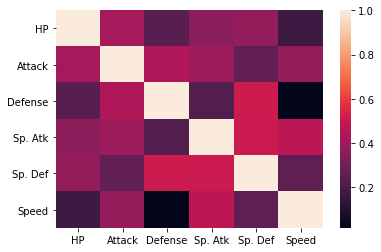

In [3]:
# Look at correlations of our high-dimensional variables
c = subset_scaled.corr()
sns.heatmap(c)

c


*Is this what we expected?*

Not exactly. Let's see what our FA model estimates as latent factors. 

There are two solutions for doing this. 

The sklearn library has a `FactorAnalysis` class [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html).
- The advantage to this is that it functions a lot like other sklearn models we've used.
- The disadvantage is that it seems to lack a lot of useful functions for interpreting factor analyses.

Meanwhile, the `FactorAnalyzer` class [here](https://factor-analyzer.readthedocs.io/en/latest/) seems to be more commonly used in analyses and tutorials people have posted online and has more functionality.

In [4]:
# !pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis


### Selecting the number of factors

Just like with PCA, our first step with factor analysis is to choose the number of factors. 

Here, people often use the *eigenvalues of each latent factor* to choose how many factors to include. The eigenvalue of the factor essentially indicates how much variance each factor is explaining relative to the underlying variables ([source](https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42)).

Any value greater than 1 means it is explaining more than a single individual variable, which means it's probably helpful. 

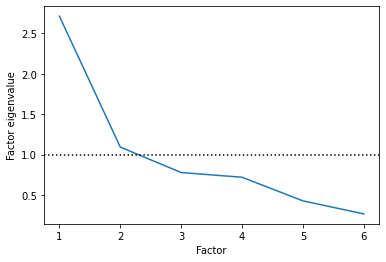

In [5]:
fa = FactorAnalyzer()
fa.fit(subset_scaled, len(cols))

ev, v = fa.get_eigenvalues()

sns.lineplot(x = np.arange(1, len(cols)+1), y = ev)
plt.axhline(1, c = "k", ls = ":")
plt.ylabel("Factor eigenvalue")
plt.xlabel("Factor")
plt.show()

Based on this, it looks like two latent factors is an appropriate number!

Let's fit a factor analysis model with two latent factors:

In [6]:
fa = FactorAnalyzer(2)
fa.fit(subset_scaled)

FactorAnalyzer(n_factors=2, rotation_kwargs={})

The FactorAnalyzer class exports a lot of functionality!

In [7]:
dir(fa)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_arg_checker',
 '_check_n_features',
 '_fit_factor_analysis',
 '_fit_ml_objective',
 '_fit_principal',
 '_fit_uls_objective',
 '_get_factor_variance',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_normalize_ml',
 '_normalize_uls',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'bounds',
 'corr_',
 'fit',
 'fit_transform',
 'get_communalities',
 'get_eigenvalues',
 'get_factor_variance',
 'get_params',
 'get_uniquenesses',
 'impute',
 'is_corr_matrix',
 'loadings_',
 'mean_',
 'method',
 'n_factors',
 'phi_',
 'rotation',
 'rotation_kwargs',
 'rotati

Now, let's look at the *loadings* for each factor. 

This tells us how strong the relationship is between each observed variable and our latent variables:

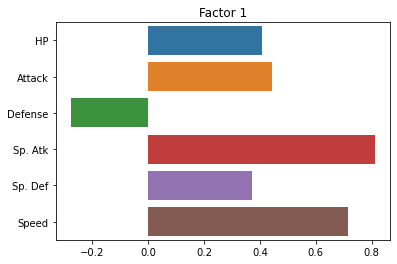

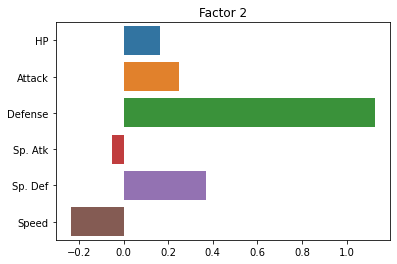

array([[ 0.40860905,  0.16261274],
       [ 0.44318863,  0.24865551],
       [-0.27736748,  1.12755493],
       [ 0.81237948, -0.05022259],
       [ 0.36989369,  0.37097783],
       [ 0.71462316, -0.23628463]])

In [8]:
sns.barplot(x = fa.loadings_[:, 0], y = cols)
plt.title("Factor 1")
plt.show()

sns.barplot(x = fa.loadings_[:, 1], y = cols)
plt.title("Factor 2")
plt.show()

fa.loadings_

Just for good measure, here's how we do the same thing with the sklearn package.

Note, for some reason, the factor loadings are essentially swapped with the sklearn version, not totally sure why.

However, the results *across* the two factors are very similar.

In [9]:
fa_sk = FactorAnalysis(n_components = 2, 
                       random_state = 0
                      )
fa_sk.fit(X = subset_scaled)

FactorAnalysis(n_components=2)

In [10]:
fa_sk.components_
# fa.components_[0]

array([[ 0.28805287,  0.47741779,  0.97067396,  0.29453491,  0.55673398,
         0.06883294],
       [ 0.40088512,  0.37844834, -0.08221658,  0.74945399,  0.40043021,
         0.60960599]])

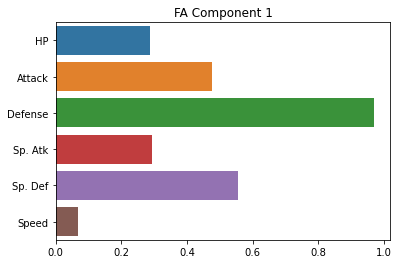

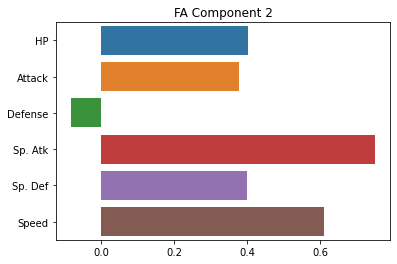

In [11]:
sns.barplot(x = fa_sk.components_[0], y = cols)
plt.title("FA Component 1")
plt.show()

sns.barplot(x = fa_sk.components_[1], y = cols)
plt.title("FA Component 2")
plt.show()

### Rotations

One of the neat tools available with factor analysis is computing "rotations" of the factors.

We're not going to get into the statistics of this, but instead focus on the *goal* of rotations, which is to make the factors more interpretable. 

A rotation tries to make it so that each factor has loadings that are either close to 0 or very high and across factors, different original variables have 0 or high values.

Here's what it looks like with our pokemon data:

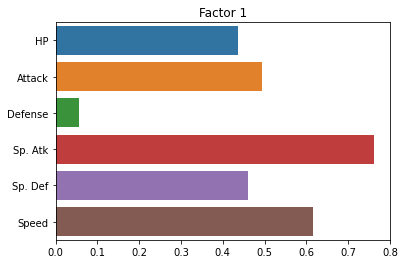

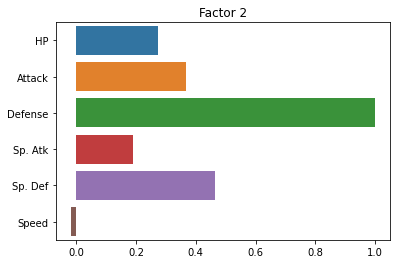

array([[ 0.43711331,  0.27487173],
       [ 0.4946431 ,  0.36743549],
       [ 0.05503063,  1.00032837],
       [ 0.76291798,  0.18836155],
       [ 0.4592798 ,  0.46337713],
       [ 0.61652876, -0.01849209]])

In [12]:
fa = FactorAnalyzer(n_factors = 2, rotation = 'varimax')
fa.fit(subset_scaled)

sns.barplot(x = fa.loadings_[:, 0], y = cols)
plt.title("Factor 1")
plt.show()

sns.barplot(x = fa.loadings_[:, 1], y = cols)
plt.title("Factor 2")
plt.show()

fa.loadings_

Did it help? Not a ton.

Essentially, it seems to be exaggerating the "Defense" versus "everything else" distinction.

But this is kind of helpful! It tells us that the two *latent factors* in our pokemon data are a pokemon's defensive skill and a combination of its other variables that (presumably) reflect more offensive abilities.

Here's how we do the same thing with the sklearn `FactorAnalysis` class:

In [13]:
fa_rot = FactorAnalysis(n_components = 2, 
                        rotation = 'varimax',
                        random_state = 0
                       )
fa_rot.fit(X = subset_scaled)

TypeError: __init__() got an unexpected keyword argument 'rotation'

In [14]:
fa_rot.components_

NameError: name 'fa_rot' is not defined

In [15]:
sns.barplot(x = fa_rot.components_[0], y = cols)
plt.title("FA (rotated) Component 1")
plt.show()

sns.barplot(x = fa_rot.components_[1], y = cols)
plt.title("FA (rotated) Component 2")
plt.show()


NameError: name 'fa_rot' is not defined

When introducing this earlier, we contrasted it with PCA in part based on its interpretability. 

Let's look at the first two principal components of our pokemon data to see how they compare: 

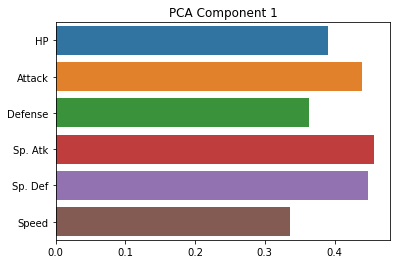

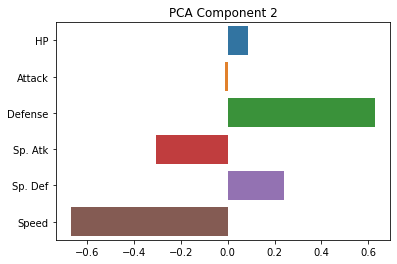

In [16]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 0).fit(subset_scaled)

sns.barplot(x = pca.components_[0], y = cols)
plt.title("PCA Component 1")
plt.show()

sns.barplot(x = pca.components_[1], y = cols)
plt.title("PCA Component 2")
plt.show()


As you can see, these are indeed much less interpretable! 

The first component seems to be kind of a generic amalgam of our existing dimensions, while the second one draws a sharp contrast between defense and speed. However, neither of these gives us a particularly intuitive answer about the underlying (low-dimensional) variables that our data is expressing. 

This is what makes factor analysis useful!


### Analyzing factors

Now, a last thing we can do is *transform* our data onto their values for each of the factors discovered by the factor analysis, and see if there are any notable clusters or patterns in the data. 

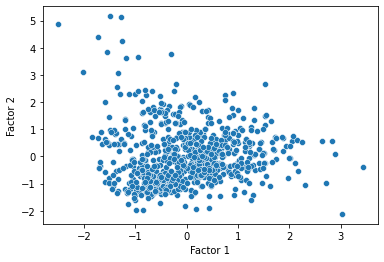

In [17]:
pokemon_transformed = fa.fit_transform(subset_scaled)

pokemon_transformed = pd.DataFrame(pokemon_transformed, columns = ["Factor 1", "Factor 2"])

sns.scatterplot(data = pokemon_transformed, x = "Factor 1", y = "Factor 2")
plt.show()

# Worked example: comparing FA and PCA with the `iris` dataset

In the code below, I've done some factor analysis and principal components analysis of the `iris` dataset, to compare how the two approaches identify lower dimensional representations for our data. 

Recall that the iris dataset represents each iris in 4 dimensions (sepal length and width, petal length and width). Since it also has labels (`species`), it's easier to evaluate how successfully the dimensionality reduction techniques manage to preserve or even exaggerate the differences in the target variable.

**If we have time remaining, go through the code blocks below and start by trying to solve the problem on your own. You can do all of this with code from earlier in this lecture. If you need a hint, the solution is provided at the bottom of each block.** 

In [18]:
### INSTRUCTIONS ### 
# First, read in the `iris` dataset from seaborn and save it to a variable called 'iris'
###



### YOUR CODE HERE ### 









### SOLUTION ###
# iris = sns.load_dataset('iris')
# iris

In [19]:
### INSTRUCTIONS ### 
# Next, fit a factor analysis to the iris predictor columns (sepal length + width, petal length + width)
# Use the FactorAnalyzer class (not the sklearn version)
# Use 4 factors in the factor analysis, then use the FactorAnalyzer `get_eigenvalues` function to extract
# eigenvalues for each factor. Plot these eigenvalues to see how many factors we should use in our analysis.
###



### YOUR CODE HERE ###









### SOLUTION ###
# fa = FactorAnalyzer()
# fa.fit(iris.loc[:, ('sepal_length', 'sepal_width', 'petal_length', 'petal_width')], 4)
# ev, v = fa.get_eigenvalues()

# sns.lineplot(x = np.arange(1, 5), y = ev)
# plt.axhline(1, c = "k", ls = ":")
# plt.show()

In [20]:
### INSTRUCTIONS ###
# Now, fit a factor analysis model to the petal length + width and sepal length + width data from iris,
# using the number of factors you identified above. Use the 'varimax' rotation to ensure interpretable factors.
# Then, plot the "loadings" for each of the original columns onto your factors. What do they show?
###



### YOUR CODE HERE ###









### SOLUTION ### 
# cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# fa = FactorAnalyzer(n_factors = 2, rotation = 'varimax')
# fa.fit(iris.loc[:, cols])

# sns.barplot(x = fa.loadings_[:, 0], y = cols)
# plt.title("Factor 1")
# plt.show()
# sns.barplot(x = fa.loadings_[:, 1], y = cols)
# plt.title("Factor 2")
# plt.show()

# fa.loadings_

In [21]:
### INSTRUCTIONS ###
# Now, let's compare the factors you identified above with the principal components of the same data.
# Use the sklearn `PCA` class to extract the principal components of the iris data.
# Use the same 4-dimensional iris data as above (petal length + width, sepal length + width) and 
# identify the same number of principal components as factors you selected previously.
# Once you've fit the PCA, plot the weights for each principal component.
# How do they compare to the factor loadings above?
###



### YOUR CODE HERE ### 









### SOLUTION ###
# pca = PCA(n_components = 2, random_state = 0).fit(iris.loc[:, cols])

# sns.barplot(x = pca.components_[0], y = cols)
# plt.title("PCA Component 1")
# plt.show()

# sns.barplot(x = pca.components_[1], y = cols)
# plt.title("PCA Component 2")
# plt.show()

In [22]:
### INSTRUCTIONS ###
# Now, let's see how the iris data looks when transformed onto the two factors you identified with your factor analysis.
# Use the `FactorAnalyzer` `fit_transform` function to transform the 4 iris dimensions (petal and sepal variables)
# onto the two factors. Save these transformed values to a dataframe with "Factor 1" and "Factor 2" as the columns.
# Next, add the iris "species" column to this new dataframe. 
# Finally, make a scatterplot with "Factor 1" on X, "Factor 2" on Y, and the "species" value as the hue.
# What do the different species look like when projected onto these two factors?
###



### YOUR CODE HERE ###









### SOLUTION ### 
# x_trans = fa.fit_transform(iris.loc[:, cols])
# df_trans = pd.DataFrame(x_trans, columns = ["Factor 1", "Factor 2"])
# df_trans['species'] = iris['species']

# sns.scatterplot(data = df_trans, x = "Factor 1", y = "Factor 2", hue = "species")
# plt.show()

In [23]:
### INSTRUCTIONS ###
# Finally, let's compare the low-dimensional representation of the iris data from our factor analysis above
# to what we get from PCA. Below, use the `PCA` `fit_transform` function to project the 4-dimensional iris 
# feature variables onto the two principal components you found above. 
# Create a new dataframe with these transformed values. Name the columns "PC 1" and "PC 2".
# Now, add the `species` column from the original iris dataframe to your new dataframe.
# Finally, make a scatterplot of the low dimensional data just as you did above, this time with
# "PC 1" on X, "PC 2" on Y, and "species" as the hue. 
# How does this figure compare to the factor analysis results above?
###



### YOUR CODE HERE ###









### SOLUTION ###
# x_pca = pca.fit_transform(iris.loc[:, cols])
# df_pca = pd.DataFrame(x_pca, columns = ["PC 1", "PC 2"])
# df_pca['species'] = iris['species']

# sns.scatterplot(data = df_pca, x = "PC 1", y = "PC 2", hue = "species")
# plt.show()